## Procesos ETL o Data Wrangling
### 1. Carga de Datasets

In [33]:
os.getcwd()

'c:\\Users\\CynYDie\\Desktop\\UTN_Haedo\\Clases\\Clase5_ETL'

In [1]:
# Diabetes
#
import pandas as pd
import os
separador=os.sep

# Path del archivo
carpeta=str(os.path.join(os.getcwd(),"datasets"))
archivo=str(os.path.join(carpeta,"diabetes.csv"))

# Convertir archivo a DataFrame de Pandas
df_diabetes = pd.read_csv(archivo)

# Tamaño del datast
print("\nTamaño: ",df_diabetes.shape)

# Columnas
columnas_diabetes=df_diabetes.columns.tolist()
print("\nColumnas=",columnas_diabetes)

# Tipos de variables
print("\nTipos de variable:")
print(df_diabetes.info())

# Estadisticos:
print("\nEstadísticos:")
print(df_diabetes.describe())
print(df_diabetes.head())



Tamaño:  (768, 9)

Columnas= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes']

Tipos de variable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Estadísticos:
       Pregnancies     Glucose  BloodPressur

In [2]:
# Titanic
#
# URL del dataset en GitHub
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Cargar el dataset desde la URL
df_titanic = pd.read_csv(url)

# Tamaño del datast
print("\nTamaño: ",df_titanic.shape)

# Columnas
columnas_titanic=df_titanic.columns.tolist()
print("\nColumnas=",columnas_titanic)

# Tipos de variables
print("\nTipos de variable:")
print(df_titanic.info())

# Estadisticos:
print("\nEstadísticos:")
print(df_titanic.describe())

# Guardar CSV
nombre_archivo="datasets"+str(separador)+"titanic.csv"
df_titanic.to_csv(nombre_archivo)


Tamaño:  (891, 12)

Columnas= ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Tipos de variable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Estadísticos:
       PassengerId    Survived      Pclass         Age  

### 2. Inconsistencias y anomalias

In [3]:
# Dataset de Diabetes

# Identificar valores duplicados 
duplicados = df_diabetes.duplicated().sum() 
print(f"\nValores duplicados: {duplicados}") 

# Identificar valores faltantes 
valores_faltantes = df_diabetes.isnull().sum() 
print("\nValores faltantes por columna:") 
print(valores_faltantes) 

# Mostrar Variables con ceros 
print("\nCantidad de Ceros:")
for columna in columnas_diabetes[1:]:
    num_zeros = (df_diabetes[columna] == 0).sum()
    print(f"{columna}: {num_zeros}")


Valores duplicados: 0

Valores faltantes por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

Cantidad de Ceros:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Diabetes: 500


In [4]:
# Dataset de Titanic

# Identificar valores duplicados 
duplicados = df_titanic.duplicated().sum() 
print(f"\nValores duplicados: {duplicados}") 

# Identificar valores faltantes 
valores_faltantes = df_titanic.isnull().sum() 
print("\nValores faltantes por columna:") 
print(valores_faltantes) 

# Mostrar Variables con ceros 
print("\nCantidad de Ceros:")
for columna in columnas_titanic[:]:
    num_zeros = (df_titanic[columna] == 0).sum()
    print(f"{columna}: {num_zeros}")


Valores duplicados: 0

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cantidad de Ceros:
PassengerId: 0
Survived: 549
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 608
Parch: 678
Ticket: 0
Fare: 15
Cabin: 0
Embarked: 0


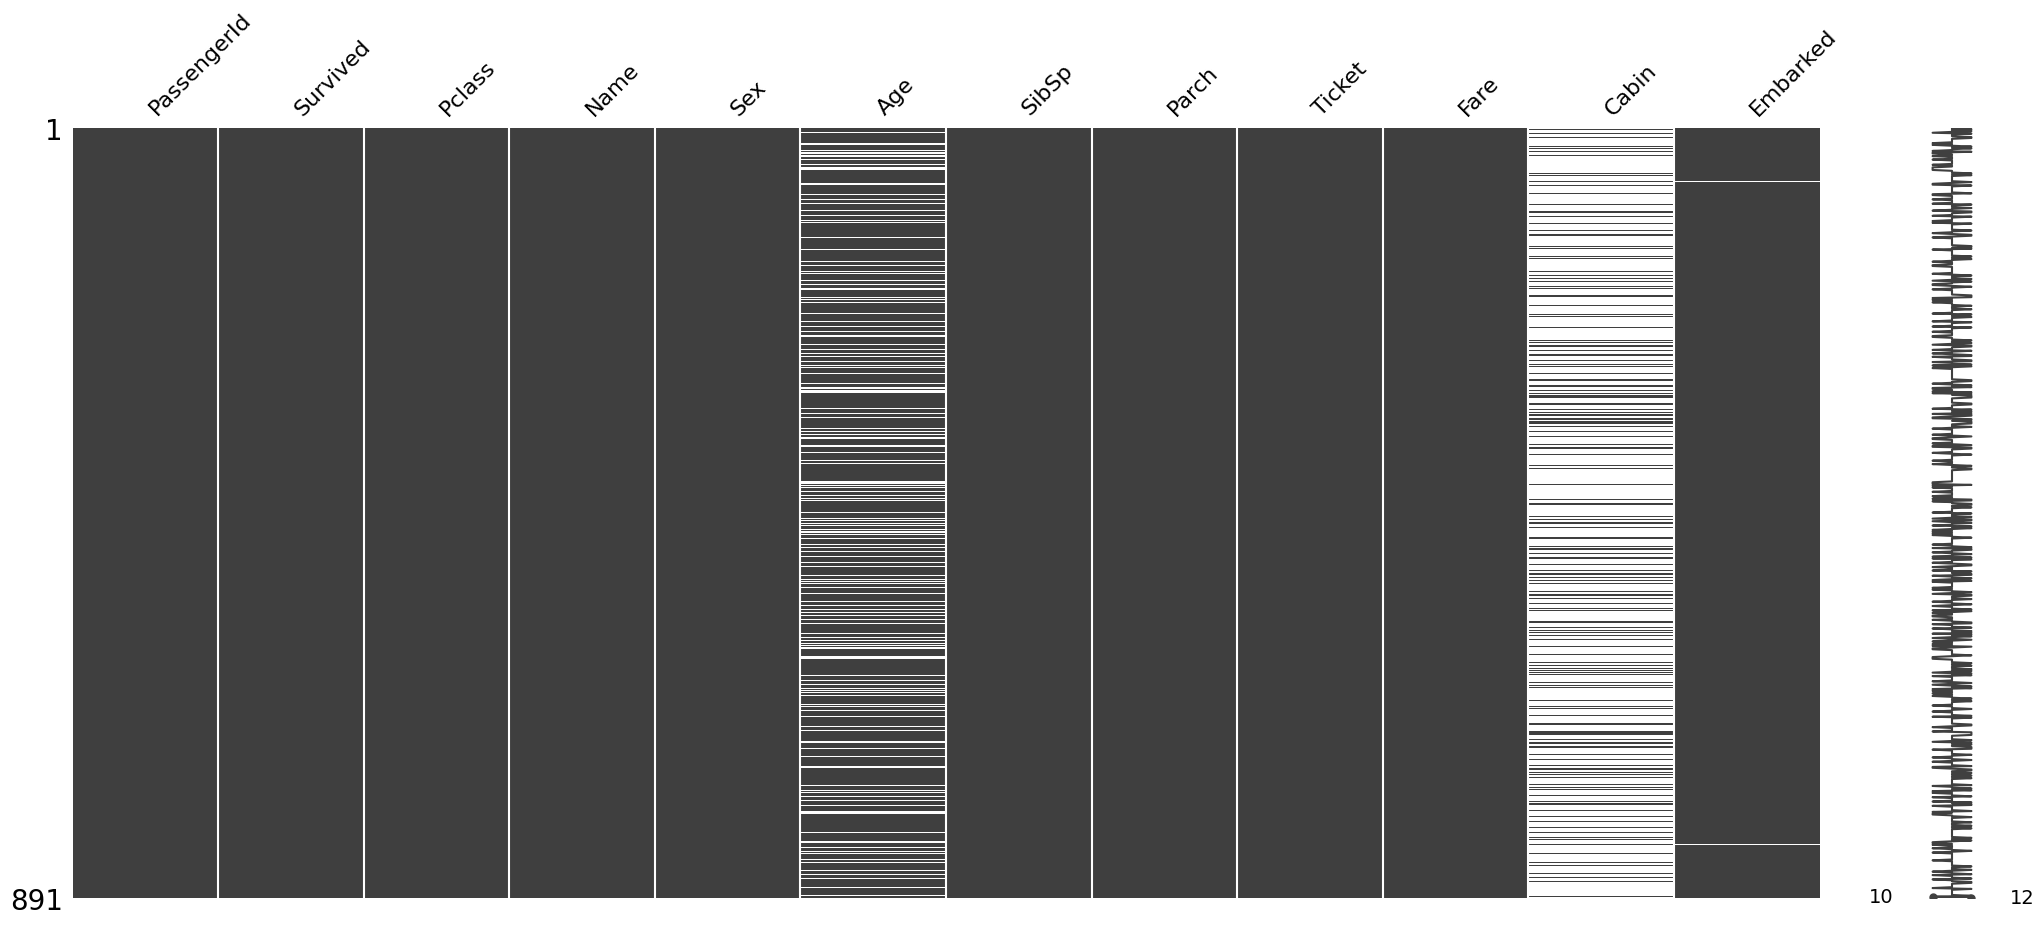

In [5]:
#Missingno

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_titanic)
plt.show()


## 3. Manejo de Anomalías y datos faltantes
### Diabetes:

In [6]:
medias=[]
variables=[]
print("Promedios de columnas excluyendo ceros (reemplazarán a los datos faltantes o nulos)")
for i in range (1,len(columnas_diabetes)-1):
    variable=columnas_diabetes[i]
    mean_excluding_zeros = df_diabetes[df_diabetes[variable] != 0][variable].mean()
    variables.append(variable)
    medias.append(mean_excluding_zeros)
dfMedias=pd.DataFrame()
dfMedias["Variable"]=variables
dfMedias["Promedio"]=medias
print(dfMedias)

print("\nReemplazo de los datos faltantes o nulos)")
# Reemplazar los ceros por el valor medio calculado

columns_to_impute = df_diabetes.columns.difference(['Pregnancies', 'Diabetes'])
# Calcular los promedios excluyendo los ceros para cada columna relevante
mean_values = {}
for column in columns_to_impute:
    mean_values[column] = df_diabetes[df_diabetes[column] != 0][column].mean()

# Reemplazar los ceros por los promedios calculados
for column in columns_to_impute:
    df_diabetes[column] = df_diabetes[column].replace(0, mean_values[column])

# Mostrar los resultados
print(df_diabetes.head())            

Promedios de columnas excluyendo ceros (reemplazarán a los datos faltantes o nulos)
                   Variable    Promedio
0                   Glucose  121.686763
1             BloodPressure   72.405184
2             SkinThickness   29.153420
3                   Insulin  155.548223
4                       BMI   32.457464
5  DiabetesPedigreeFunction  428.235091
6                       Age   33.240885

Reemplazo de los datos faltantes o nulos)
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Diabetes  
0                     627.0   50         1  
1           

In [7]:
df_diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Diabetes  
0                      627.00   50         1  
1                      351.00   31         0  
2                      672.00   32         1  
3                      167.00   21         0  
4                     2288.00   33         1  
..                        ...  ...       ...  
763                    171.00   63         0  
764                      0.34   27         0  
765                    245.00   30         0  
766                    349.00   47         1  
767                    315.00   23         0  

[768 rows x 9 columns]

### Titanic

In [8]:
# Imputar datos faltantes 
# A faltantes de edad se imputa la mediana
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

# A faltantes de cabina, se le imputa “NC”
df_titanic['Cabin'].fillna('NC', inplace=True)

In [9]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500    NC        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250    NC        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500    NC        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000    NC        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500    NC        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500    NC        Q  

[891 rows x 12 columns]

In [10]:
## Indexación
### Uso de iloc en Titanic

In [11]:
# Seleccionar las columnas de la segunda a la cuarta  
sub_df=df_titanic.iloc[0:5, 1:4]
print("\nColumnas 1 a 4:\n", sub_df)

# Valor promedio de la columna 5
valor=df_titanic.iloc[:,5].mean()
print("\nValor promedio de la columna 5 (", str(df_titanic.columns.to_list()[5]), "):", str(valor))


Columnas 1 a 4:
    Survived  Pclass                                               Name
0         0       3                            Braund, Mr. Owen Harris
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2         1       3                             Heikkinen, Miss. Laina
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4         0       3                           Allen, Mr. William Henry

Valor promedio de la columna 5 ( Age ): 29.36158249158249


### Ejemplo de loc en Diabetes

In [12]:
# Seleccionar las primeras 5 filas y las columnas 'Age', 'Glucose' y 'Diabetes'
selected_data = df_diabetes.loc[:4, ['Age', 'Glucose', 'Diabetes']]
print(selected_data)

print("")
# Seleccionar todas las donde glucose > 195 y las columnas 'Age', 'Glucose' y 'Diabetes'
filtrado_Glucose = df_diabetes.loc[df_diabetes['Glucose'] > 195, ['Age', 'Glucose', 'Diabetes']]
print(filtrado_Glucose)

   Age  Glucose  Diabetes
0   50    148.0         1
1   31     85.0         0
2   32    183.0         1
3   21     89.0         0
4   33    137.0         1

     Age  Glucose  Diabetes
8     53    197.0         1
22    41    196.0         1
206   57    196.0         1
228   31    197.0         0
359   29    196.0         1
408   39    197.0         1
561   28    198.0         1
579   62    197.0         1
661   22    199.0         1


## Agrupacion y Agregacion
### Agrupación sobre Diabetes

In [13]:
# Agrupar por Diagnóstico de diabetes y calcular la menor edad y mayor glucosa
agrupado_diabetes = df_diabetes.groupby('Diabetes').agg({'Age': 'min', 'Glucose': 'max'})
print(agrupado_diabetes)

          Age  Glucose
Diabetes              
0          21    197.0
1          21    199.0


## Uniones y Fusiones
### Union (join) sobre Diabetes

In [24]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
# Crear DataFrames adicionales para simular la unión 
df_medidas = df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',  'Age']] 
print("Datos médicos:\n",df_medidas)
df_demografico = df_diabetes[['Age', 'Diabetes']] 
print("\nDatos demográficos:\n",df_demografico)
print("")
# Realizar la unión 
unido_diabetes = df_medidas.join(df_demografico.set_index('Age'), on='Age', how='inner', lsuffix='_med', rsuffix='_demo') 
print("\nUnion de Dataframes\n",unido_diabetes.head(10))

Datos médicos:
      Glucose  BloodPressure  SkinThickness     Insulin   BMI  Age
0      148.0           72.0       35.00000  155.548223  33.6   50
1       85.0           66.0       29.00000  155.548223  26.6   31
2      183.0           64.0       29.15342  155.548223  23.3   32
3       89.0           66.0       23.00000   94.000000  28.1   21
4      137.0           40.0       35.00000  168.000000  43.1   33
..       ...            ...            ...         ...   ...  ...
763    101.0           76.0       48.00000  180.000000  32.9   63
764    122.0           70.0       27.00000  155.548223  36.8   27
765    121.0           72.0       23.00000  112.000000  26.2   30
766    126.0           60.0       29.15342  155.548223  30.1   47
767     93.0           70.0       31.00000  155.548223  30.4   23

[768 rows x 6 columns]

Datos demográficos:
      Age  Diabetes
0     50         1
1     31         0
2     32         1
3     21         0
4     33         1
..   ...       ...
763   63     

In [34]:
unido_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24226 entries, 0 to 674
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        24226 non-null  float64
 1   BloodPressure  24226 non-null  float64
 2   SkinThickness  24226 non-null  float64
 3   Insulin        24226 non-null  float64
 4   BMI            24226 non-null  float64
 5   Age            24226 non-null  int64  
 6   Diabetes       24226 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.5 MB


In [28]:
age_50_count = (df_diabetes['Age'] == 50).sum()
print(age_50_count)

8


### Fusion (Merge) sobre Titanic

In [15]:
# Crear un DataFrame adicional para simular la fusión
data_adicional = {
    'Pclass': [1, 2, 3],
    'Average_Fare': [84.154687, 20.662183, 13.675550]
}
df_adicional = pd.DataFrame(data_adicional)

# Realizar la fusión
fusionado_titanic = pd.merge(df_titanic, df_adicional, on='Pclass', how='left')
print(fusionado_titanic[['Pclass', 'Fare', 'Average_Fare']].head(10))

   Pclass     Fare  Average_Fare
0       3   7.2500     13.675550
1       1  71.2833     84.154687
2       3   7.9250     13.675550
3       1  53.1000     84.154687
4       3   8.0500     13.675550
5       3   8.4583     13.675550
6       1  51.8625     84.154687
7       3  21.0750     13.675550
8       3  11.1333     13.675550
9       2  30.0708     20.662183


In [37]:
df_adicional.head()

Pclass  Average_Fare
0       1     84.154687
1       2     20.662183
2       3     13.675550

In [38]:
fusionado_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      889 non-null    object 
 12  Average_Fare  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


## Discretizacion

### Titanic

In [16]:
# Tratamiento de las variables categoricas:
variables_categoricas=['Name','Sex','Cabin','Ticket','Embarked']

# Cantidad de valores posibles (no numéricos) por variable
df_cat=pd.DataFrame()
val_posibles=[]
for i in range(len(variables_categoricas)):
        variable=variables_categoricas[i]
        valor=len(list(set(list(df_titanic[variable]))))
        val_posibles.append(valor)
df_cat["Variable"]=variables_categoricas
df_cat["valores posibles"]=val_posibles
print("Valores posibles por variable categorica:")
print(df_cat)        

Valores posibles por variable categorica:
   Variable  valores posibles
0      Name               891
1       Sex                 2
2     Cabin               148
3    Ticket               681
4  Embarked                 4


Con esta información definimos: eliminación de columnas Name, Cabin y Ticket, y haremos la discretización de Sex y Embarked

In [31]:
# Eliminacion de columnas
df_titanic_cleaned = df_titanic.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'])

# Discretizacion de variables:
df_titanic_encoded=pd.get_dummies(df_titanic_cleaned,columns=['Pclass','Sex','Embarked'])
df_titanic_encoded

Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0           0  22.0      1      0   7.2500     False     False      True   
1           1  38.0      1      0  71.2833      True     False     False   
2           1  26.0      0      0   7.9250     False     False      True   
3           1  35.0      1      0  53.1000      True     False     False   
4           0  35.0      0      0   8.0500     False     False      True   
..        ...   ...    ...    ...      ...       ...       ...       ...   
886         0  27.0      0      0  13.0000     False      True     False   
887         1  19.0      0      0  30.0000      True     False     False   
888         0  28.0      1      2  23.4500     False     False      True   
889         1  26.0      0      0  30.0000      True     False     False   
890         0  32.0      0      0   7.7500     False     False      True   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         False      True       False       False        True  
1          True     False        True       False       False  
2          True     False       False       False        True  
3          True     False       False       False        True  
4         False      True       False       False        True  
..          ...       ...         ...         ...         ...  
886       False      True       False       False        True  
887        True     False       False       False        True  
888        True     False       False       False        True  
889       False      True        True       False       False  
890       False      True       False        True       False  

[891 rows x 13 columns]

## Normalización
### Diabetes

In [18]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador estándar
scaler = StandardScaler()

target = df_diabetes['Diabetes']

# Ajustar el escalador y transformar los datos
data_normalized = scaler.fit_transform(df_diabetes)

# Convertir el resultado a un DataFrame y agregar de nuevo la columna 'Outcome'
data_normalized = pd.DataFrame(data_normalized, columns=df_diabetes.columns)
data_normalized['Diabetes'] = target

# Mostrar los primeros registros del dataset normalizado
print("Primeros registros del dataset normalizado:")
print(data_normalized.head())

Primeros registros del dataset normalizado:
   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  Diabetes  
0  0.166292                  0.584149  1.425995         1  
1 -0.852531                 -0.226986 -0.190672         0  
2 -1.332833                  0.716400 -0.105584         1  
3 -0.634212                 -0.767743 -1.041549         0  
4  1.548980                  5.465654 -0.020496         1  
